In [1]:
import pandas as pd
import numpy as np
# Lets load the dataset
data = pd.read_csv('Bank_Fraud_details.csv') 
data.head()


,Transaction_ID,Customer_ID,Transaction_Amount,Location,Time_of_Day,Is_Fraudulent
0,1,101,1000,Mumbai,Morning,0
1,2,102,500,Delhi,Afternoon,1
2,3,103,2000,Chennai,Evening,0
3,4,104,300,Gujarat,Morning,1
4,5,105,800,Bengalore,Afternoon,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Transaction_ID      20 non-null     int64 
 1   Customer_ID         20 non-null     int64 
 2   Transaction_Amount  20 non-null     int64 
 3   Location            20 non-null     object
 4   Time_of_Day         20 non-null     object
 5   Is_Fraudulent       20 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.1+ KB


In [3]:
# Lets check for missing values
print("\nChecking for missing values:\n", data.isnull().sum())



Checking for missing values:
 Transaction_ID        0
Customer_ID           0
Transaction_Amount    0
Location              0
Time_of_Day           0
Is_Fraudulent         0
dtype: int64


Now its time for doing EDA

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9548\4022107426.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is_Fraudulent', data=data, palette='coolwarm')


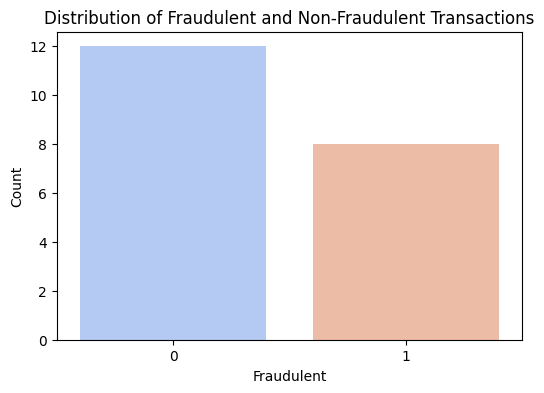

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Fraudulent vs Non-Fraudulent Transactions

plt.figure(figsize=(6, 4))
sns.countplot(x='Is_Fraudulent', data=data, palette='coolwarm')
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()


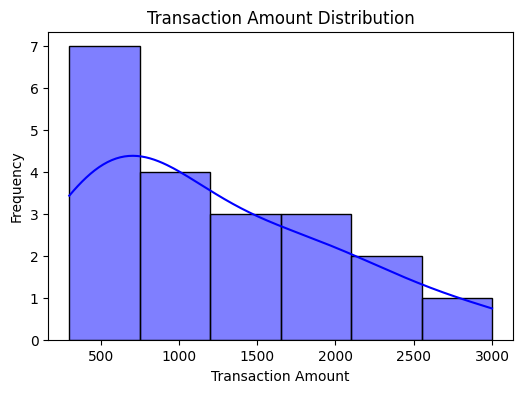

In [5]:
# Transaction Amount Distribution

plt.figure(figsize=(6, 4))
sns.histplot(data['Transaction_Amount'], kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


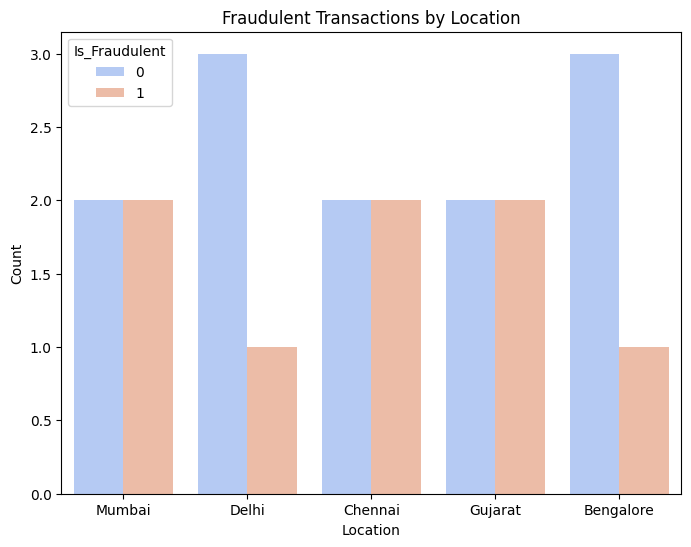

In [6]:
# Fraudulent Transactions by Location

plt.figure(figsize=(8, 6))
sns.countplot(x='Location', hue='Is_Fraudulent', data=data, palette='coolwarm')
plt.title('Fraudulent Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


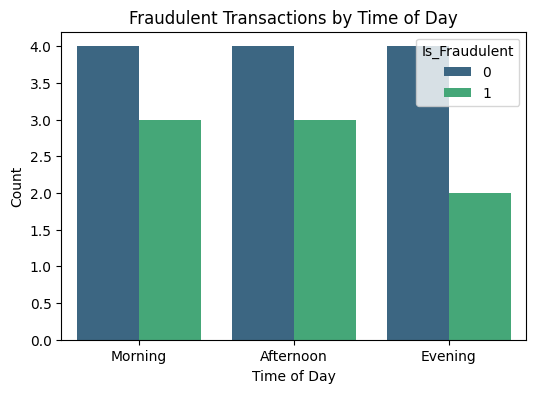

In [7]:
# Fraudulent Transactions by Time of Day

plt.figure(figsize=(6, 4))
sns.countplot(x='Time_of_Day', hue='Is_Fraudulent', data=data, palette='viridis')
plt.title('Fraudulent Transactions by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9548\2280395740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Fraudulent', y='Transaction_Amount', data=data, palette='Set2')


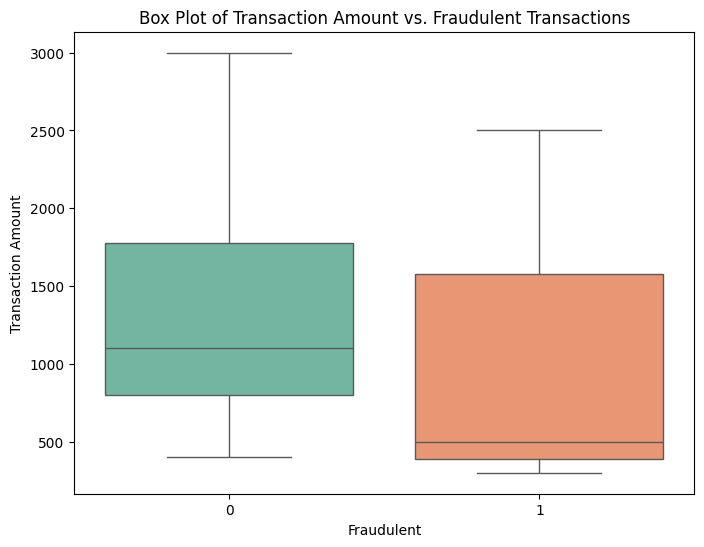

In [8]:
# Box Plot of Transaction Amount vs. Fraudulent Transactions

plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_Fraudulent', y='Transaction_Amount', data=data, palette='Set2')
plt.title('Box Plot of Transaction Amount vs. Fraudulent Transactions')
plt.xlabel('Fraudulent')
plt.ylabel('Transaction Amount')
plt.show()



Lets prepare our Data. We have two Categorical features. Lets convert them 

In [9]:
# Encoding 'Location' and 'Time_of_Day' as categorical features

data['Location'] = data['Location'].astype('category').cat.codes
data['Time_of_Day'] = data['Time_of_Day'].astype('category').cat.codes


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Transaction_ID      20 non-null     int64
 1   Customer_ID         20 non-null     int64
 2   Transaction_Amount  20 non-null     int64
 3   Location            20 non-null     int8 
 4   Time_of_Day         20 non-null     int8 
 5   Is_Fraudulent       20 non-null     int64
dtypes: int64(4), int8(2)
memory usage: 812.0 bytes


Its time to focus on Features (finding out important Features)

In [11]:
# Considering the Feature: Transaction Amount Band (low, medium, high)
bins = [0, 500, 1500, np.inf]  # Creating thresholds for transaction amounts
labels = ['Low', 'Medium', 'High']
data['Transaction_Amount_Band'] = pd.cut(data['Transaction_Amount'], bins=bins, labels=labels)
data.head()

,Transaction_ID,Customer_ID,Transaction_Amount,Location,Time_of_Day,Is_Fraudulent,Transaction_Amount_Band
0,1,101,1000,4,2,0,Medium
1,2,102,500,2,0,1,Low
2,3,103,2000,1,1,0,High
3,4,104,300,3,2,1,Low
4,5,105,800,0,0,0,Medium


In [12]:
# Lets Count the number of transactions in each band for visualization
band_counts = data['Transaction_Amount_Band'].value_counts()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9548\924833886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=band_counts.index, y=band_counts.values, palette='viridis')


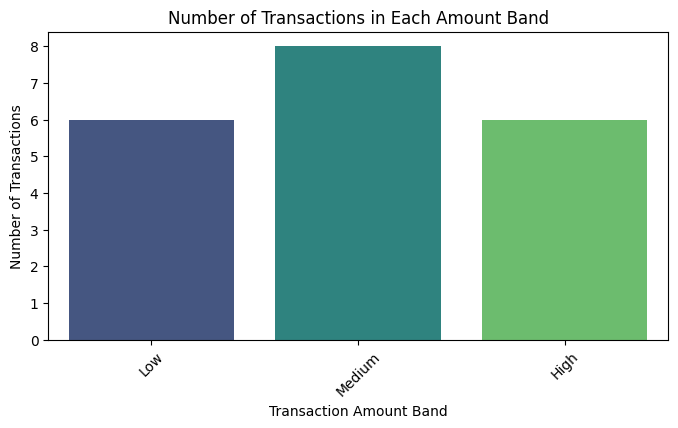

In [13]:
plt.figure(figsize=(8, 4))
sns.barplot(x=band_counts.index, y=band_counts.values, palette='viridis')
plt.title('Number of Transactions in Each Amount Band')
plt.xlabel('Transaction Amount Band')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

This Bar plot is providing a clear view of how many transactions fall into each band.

The bar plot shows the distribution of transactions across different value bands. 
Each bar’s height corresponds to the number of transactions that fall into that particular transaction amount category.
Higher bars indicate that more transactions are happening in that band, while shorter bars suggest fewer transactions in that range.

The bar plot shows that most transactions are in the "Medium" band (501 to 1500). This indicates that most of the customers are spending a moderate amount of money, but a smaller group spends much less. The "High" band has the fewest transactions, indicating that fewer customers are making large purchases.



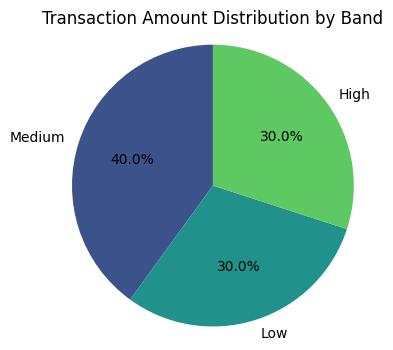

In [15]:
# Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(band_counts, labels=band_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(band_counts)))
plt.title('Transaction Amount Distribution by Band')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

This Pie chatr gives a proportional view of the distribution of transactions across the bands.

The pie chart shows that 40% of transactions are in the "Low" band, 30% in the "Medium" band, and 30% in the "High" band, you can conclude that the bulk of your revenue is likely coming from medium-sized transactions. 


In [ ]:
Now Calculate how often a customer makes transactions in a given time period. 
If a customer is making unusually frequent transactions, it may indicate fraud.

In [16]:
# Transaction Frequency (how many times each customer transacts)

data['Transaction_Frequency'] = data.groupby('Customer_ID')['Transaction_ID'].transform('count')
data.head()

,Transaction_ID,Customer_ID,Transaction_Amount,Location,Time_of_Day,Is_Fraudulent,Transaction_Amount_Band,Transaction_Frequency
0,1,101,1000,4,2,0,Medium,1
1,2,102,500,2,0,1,Low,1
2,3,103,2000,1,1,0,High,1
3,4,104,300,3,2,1,Low,1
4,5,105,800,0,0,0,Medium,1


In [17]:
# considering the Feature: Day of Week (Assuming hypothetical dates for simplicity, for real dataset use actual dates)
data['Day_of_Week'] = (data['Transaction_ID'] % 7) + 1  # 1 for Monday, 7 for Sunday
data.head()

,Transaction_ID,Customer_ID,Transaction_Amount,Location,Time_of_Day,Is_Fraudulent,Transaction_Amount_Band,Transaction_Frequency,Day_of_Week
0,1,101,1000,4,2,0,Medium,1,2
1,2,102,500,2,0,1,Low,1,3
2,3,103,2000,1,1,0,High,1,4
3,4,104,300,3,2,1,Low,1,5
4,5,105,800,0,0,0,Medium,1,6


Calculate the average transaction amount for a customer. If the current transaction deviates significantly from the customer's average, it may be suspicious.

In [18]:
# Average Transaction Amount per customer

data['Avg_Transaction_Amount'] = data.groupby('Customer_ID')['Transaction_Amount'].transform('mean')
data.head()

,Transaction_ID,Customer_ID,Transaction_Amount,Location,Time_of_Day,Is_Fraudulent,Transaction_Amount_Band,Transaction_Frequency,Day_of_Week,Avg_Transaction_Amount
0,1,101,1000,4,2,0,Medium,1,2,1000.0
1,2,102,500,2,0,1,Low,1,3,500.0
2,3,103,2000,1,1,0,High,1,4,2000.0
3,4,104,300,3,2,1,Low,1,5,300.0
4,5,105,800,0,0,0,Medium,1,6,800.0


Determine how much a particular transaction deviates from the customer’s typical transaction amount.

In [19]:
# Deviation from the average transaction amount

data['Deviation_From_Avg'] = abs(data['Transaction_Amount'] - data['Avg_Transaction_Amount'])
data.head()

,Transaction_ID,Customer_ID,Transaction_Amount,Location,Time_of_Day,Is_Fraudulent,Transaction_Amount_Band,Transaction_Frequency,Day_of_Week,Avg_Transaction_Amount,Deviation_From_Avg
0,1,101,1000,4,2,0,Medium,1,2,1000.0,0.0
1,2,102,500,2,0,1,Low,1,3,500.0,0.0
2,3,103,2000,1,1,0,High,1,4,2000.0,0.0
3,4,104,300,3,2,1,Low,1,5,300.0,0.0
4,5,105,800,0,0,0,Medium,1,6,800.0,0.0


Track whether a customer is transacting from an unusual location. This can be inferred based on past transactions.

In [20]:
# Lets flag Unusual Location (whether the transaction is happening in a usual or unusual location for the customer)
# We can assume that the most commonly location a customer transacts from is 'usual'

data['Most_Common_Location'] = data.groupby('Customer_ID')['Location'].transform(lambda x: x.mode()[0])
data['Unusual_Location'] = np.where(data['Location'] != data['Most_Common_Location'], 1, 0)
data.head()

,Transaction_ID,Customer_ID,Transaction_Amount,Location,Time_of_Day,Is_Fraudulent,Transaction_Amount_Band,Transaction_Frequency,Day_of_Week,Avg_Transaction_Amount,Deviation_From_Avg,Most_Common_Location,Unusual_Location
0,1,101,1000,4,2,0,Medium,1,2,1000.0,0.0,4,0
1,2,102,500,2,0,1,Low,1,3,500.0,0.0,2,0
2,3,103,2000,1,1,0,High,1,4,2000.0,0.0,1,0
3,4,104,300,3,2,1,Low,1,5,300.0,0.0,3,0
4,5,105,800,0,0,0,Medium,1,6,800.0,0.0,0,0


In [21]:
# Encoding our new categorical features for model input
data['Transaction_Amount_Band'] = data['Transaction_Amount_Band'].astype('category').cat.codes
data['Day_of_Week'] = data['Day_of_Week'].astype('category').cat.codes


In [22]:
# Lets define and include the new Features and labels that are calculated above
features = ['Transaction_Amount', 'Location', 'Time_of_Day', 'Transaction_Amount_Band', 'Transaction_Frequency', 'Day_of_Week']
X = data[features]
y = data['Is_Fraudulent']


In [23]:
X.head()

,Transaction_Amount,Location,Time_of_Day,Transaction_Amount_Band,Transaction_Frequency,Day_of_Week
0,1000,4,2,1,1,1
1,500,2,0,0,1,2
2,2000,1,1,2,1,3
3,300,3,2,0,1,4
4,800,0,0,1,1,5


In [24]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Is_Fraudulent, dtype: int64

In [25]:
# Lets do the Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I am planning to use two models. 
one model using Isolation Forest
Another one using One-Class SVM

Isolation Forest Model: 
An unsupervised anomaly detection method (like Isolation Forest) is used to detect fraudulent transactions. 
This method assumes that fraudulent transactions are rare and different from normal ones.

In [26]:
# Model training using Isolation Forest

from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)

IsolationForest(contamination=0.1, random_state=42)

Contamination is an important parameter that sets the expected proportion of outliers in the data.
In this case, it is set to 0.1, which means the model assumes that 10% of the transactions are fraudulent or anomalies.

In [50]:
# Predicting and evaluating the Isolation Forest model
# On training Data
y_pred_train_if = iso_forest.predict(X_train)
y_pred_train_if = np.where(y_pred_train_if == 1, 0, 1)  # Convert IsolationForest output to match fraud labels

# Predict on the test set
y_pred_test_if = iso_forest.predict(X_test)

# Convert Isolation Forest predictions: map 1 to non-fraud (0), -1 to fraud (1)
y_pred_test_if = np.where(y_pred_test_if == 1, 0, 1)

In [51]:
# Evaluating Isolation Forest (training data)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
precision_if = precision_score(y_train, y_pred_train_if)
recall_if = recall_score(y_train, y_pred_train_if)
f1_if = f1_score(y_train, y_pred_train_if)

print(f"\nIsolation Forest - Training Precision: {precision_if}")
print(f"Isolation Forest - Training Recall: {recall_if}")
print(f"Isolation Forest - Training F1-Score: {f1_if}")



Isolation Forest - Training Precision: 0.5
Isolation Forest - Training Recall: 0.14285714285714285
Isolation Forest - Training F1-Score: 0.2222222222222222


Lets print the Accuracy of our Isolation Forest model

In [52]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy score on the training data set
accuracy = accuracy_score(y_train, y_pred_train_if)

# Print the accuracy
print("Isolation Forest Model Accuracy on Training Set:", accuracy)

Isolation Forest Model Accuracy on Training Set: 0.5625


In [53]:
#Calculate the accuracy score on the test set
accuracy_test = accuracy_score(y_test, y_pred_test_if)

# Print the accuracy score
print("Isolation Forest Model Accuracy on Test Set:", accuracy_test)

Isolation Forest Model Accuracy on Test Set: 0.5


lets try with our another model : One-Class SVM
One-Class SVM (Support Vector Machine) is an unsupervised machine learning algorithm specifically designed for anomaly detection. 
It is used to identify outliers in data when only normal observations are available, 
making it highly useful for tasks like fraud detection, fault detection, and more.

One-Class SVM does not require fraudulent labels in the training data.


In [54]:
# Model training using One-Class SVM
from sklearn.svm import OneClassSVM
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)
oc_svm.fit(X_train)


OneClassSVM(gamma='auto', nu=0.1)

In [55]:
# Predicting and evaluating the One-Class SVM model
# Training Data
y_pred_train_svm = oc_svm.predict(X_train)
y_pred_train_svm = np.where(y_pred_train_svm == 1, 0, 1)  # Convert One-Class SVM output to match fraud labels

# Predicting On Test Data
y_pred_test_svm = oc_svm.predict(X_test)

# Convert One-Class SVM predictions: map 1 to non-fraud (0), -1 to fraud (1)
y_pred_test_svm = np.where(y_pred_test_svm == 1, 0, 1)

In [56]:
# Evaluating One-Class SVM (training data)
precision_svm = precision_score(y_train, y_pred_train_svm)
recall_svm = recall_score(y_train, y_pred_train_svm)
f1_svm = f1_score(y_train, y_pred_train_svm)

print(f"\nOne-Class SVM - Training Precision: {precision_svm}")
print(f"One-Class SVM - Training Recall: {recall_svm}")
print(f"One-Class SVM - Training F1-Score: {f1_svm}")


One-Class SVM - Training Precision: 0.3333333333333333
One-Class SVM - Training Recall: 0.14285714285714285
One-Class SVM - Training F1-Score: 0.2


In [57]:
# Calculate the accuracy of the model (Training Data)
accuracy = accuracy_score(y_train, y_pred_train_svm)

# Print the accuracy
print("One-Class SVM Model Accuracy on Training Set:", accuracy)

One-Class SVM Model Accuracy on Training Set: 0.5


In [58]:
# Calculate the accuracy score on the test set
accuracy_test = accuracy_score(y_test, y_pred_test_svm)

# Print the accuracy score
print("One-Class SVM Model Accuracy on Test Set:", accuracy_test)

One-Class SVM Model Accuracy on Test Set: 0.25


Lets do some Comparitive Analysis between two models

In [59]:
print("\n--- Comparative Model Evaluation ---")
print(f"Isolation Forest vs One-Class SVM (F1-Scores): {f1_if} vs {f1_svm}")


--- Comparative Model Evaluation ---
Isolation Forest vs One-Class SVM (F1-Scores): 0.2222222222222222 vs 0.2


Now lets do some real time monitoring 
Simulate real-time transactions for both models 
 lets use a hypothetical new transaction

In [60]:
new_transaction = np.array([[1500, 1, 2, 2, 5, 3]])  # Example: transaction amount=1500, Location=Mumbai (coded), Time_of_Day=Evening

In [61]:
# Isolation Forest Prediction
predicted_if = iso_forest.predict(new_transaction)
if predicted_if == -1:
    print("\nIsolation Forest Alert: Fraudulent transaction detected!")
else:
    print("Isolation Forest: Transaction is normal.")

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: Transaction is normal.


In [62]:
# One-Class SVM Prediction
predicted_svm = oc_svm.predict(new_transaction)
if predicted_svm == -1:
    print("One-Class SVM Alert: Fraudulent transaction detected!")
else:
    print("One-Class SVM: Transaction is normal.")

One-Class SVM Alert: Fraudulent transaction detected!


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


Now Lets do some Visualization

In [63]:
# Visualizing Confusion Matrix (for better analysis)
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

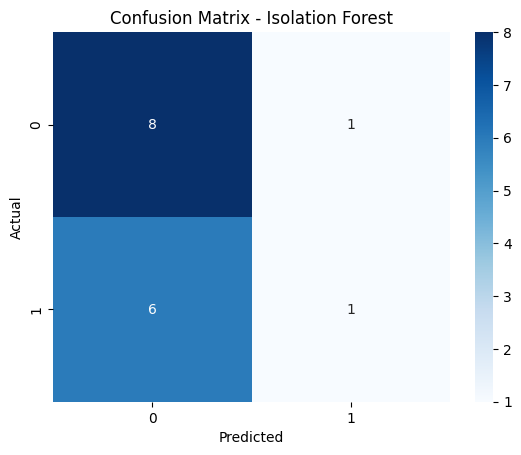

In [64]:
#Confusion matrix for Isolation Forest
plot_confusion_matrix(y_train, y_pred_train_if, 'Isolation Forest')

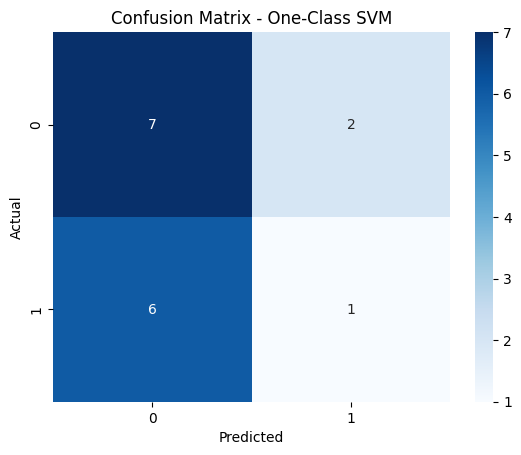

In [65]:
# Confusion matrix for One-Class SVM
plot_confusion_matrix(y_train, y_pred_train_svm, 'One-Class SVM')

Now Lets try with Simple Logistic Regression.

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training the Logistic Regression Model with Training Data
model.fit(X_train, y_train)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Lets do Model Evaluation for Logistic Regression

First we can find the Accuracy Score

In [67]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.75


In [68]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.5


In [69]:
# Lets Print the classification report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, X_test_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



Out of the 3 models used here,
Accuracy of Isolation Forest (both on training and test data) is 0.5
For One class SVM there is a difference in accuracy of Training data (0.5) and Test data(0.25) -- underfitting 
In logistic Regression there is a difference in Accuracy of Training data (0.75) and test data(0.5) - overfitting

Since We have worked with a Smaller Dataset having only 20 records and 6 features , it may not be sufficient for making accurate predictions.